# Carga de datos y exploracion inicial

In [1]:
import pandas as pd

In [45]:
npr = pd.read_csv("C:\\Users\\fabia\\Desktop\\modelos\\NewsF.csv",sep=";")

In [58]:
npr.head()

,Unnamed: 0,Type,News
0,0,Business,ad sales boost time warner profit quarterly p...
1,1,Business,dollar gains on greenspan speech the dollar h...
2,2,Business,yukos unit buyer faces loan claim the owners ...
3,3,Business,high fuel prices hit ba s profits british air...
4,4,Business,pernod takeover talk lifts domecq shares in u...


# Preprocesamiento

1. Limpieza de datos -->
(Pasar texto a minúsculas, Quitar signos de puntuación (interrogación, etc.), Quitar espacios extra, cambio de carro, tabulaciones)

In [19]:
import re
import string

In [54]:
#Primera ronda de limpieza de datos
def clean_text_round1 (text):
    '''Tranformar el texto en minúsculas.'''
    text = text.lower()
    '''Eliminar el texto entre corchetes.'''
    text = re.sub('\[.*?¿\]\%', ' ', text)
    '''Eliminar los signos de puntuación.'''
    text = re.sub('[%s]' % re.escape(string.punctuation), ' ', text)
    '''Eliminar las palabras que contienen números.'''
    text = re.sub('\w*\d\w*', '', text)
    return text

round1 = lambda x: clean_text_round1(x)

npr['News'] = npr['News'].apply(round1)


In [56]:
#Segunda ronda de limpieza
def clean_text_round2 (text):
    '''Desacerse de algunos signos de puntuación adicionales'''
    text = re.sub('[‘’“”…«»]', '', text)
    '''Textos no sensoriales que se perdieron la primera vez'''
    text = re.sub('\n', ' ', text)
    return text

round2 = lambda x: clean_text_round2(x)

npr['News'] = npr['News'].apply(round2)

In [57]:
npr.head()

,Unnamed: 0,Type,News
0,0,Business,ad sales boost time warner profit quarterly p...
1,1,Business,dollar gains on greenspan speech the dollar h...
2,2,Business,yukos unit buyer faces loan claim the owners ...
3,3,Business,high fuel prices hit ba s profits british air...
4,4,Business,pernod takeover talk lifts domecq shares in u...


# Vextorizacion

In [153]:
# Vamos a crear una matriz de términos de documentos usando CountVectorizer, y excluiremos palabras comunes
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_df=0.9,min_df=2,stop_words='english')
dtm = cv.fit_transform(npr['News'])

In [154]:
dtm

<2225x16692 sparse matrix of type '<class 'numpy.int64'>'
	with 298327 stored elements in Compressed Sparse Row format>

In [155]:
#Creamod matriz de frecuencia de palabras
data_dtm = pd.DataFrame(dtm.toarray(),columns=cv.get_feature_names())

In [156]:
data_dtm.transpose().head()

,0,1,2,3,4,5,6,7,8,9,...,2215,2216,2217,2218,2219,2220,2221,2222,2223,2224
aaa,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
aaas,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
aac,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
aaron,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
abacus,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Top 30 Palabras mas utilizadas

In [157]:
x=1
top_dict = {}
top=[]
top = np.sum(data_dtm.transpose(),axis=1)

In [158]:
top.sort_values(ascending=False).head(30)

said          7255
mr            3005
year          2309
people        2045
new           1978
time          1322
world         1201
government    1160
uk            1115
years         1003
best           974
just           957
make           945
told           911
film           890
like           879
game           871
music          839
labour         804
bbc            767
set            762
number         760
way            740
added          733
market         702
says           687
company        686
home           663
election       662
good           646
dtype: int64

# Añadir palabras al Stop Words

# Nube de palabras

In [161]:
from wordcloud import WordCloud
wc = WordCloud(stopwords='english', background_color="white",colormap="Dark2",max_font_size=150,random_state=42)

In [162]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [16,12]

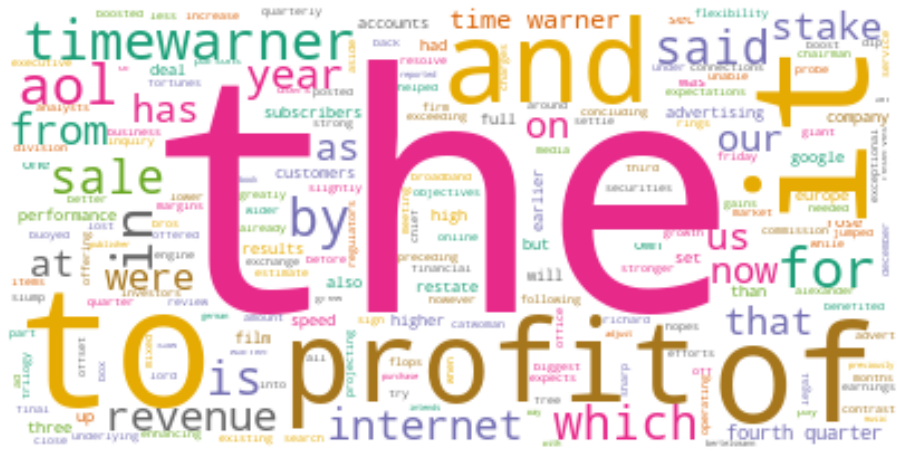

In [170]:
wc.generate(npr["News"][0])
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

#for index, anio in enumerate(data.columns):
#    wc.generate(data_clean.transcript[anio])
#    plt.subplot(4, 3, index+1)
#    plt.imshow(wc, interpolation="bilinear")
#    plt.axis("off")
#    plt.title(anios[index])
#plt.show()

# Analisis de factor transformacion

In [6]:
from sklearn.decomposition import FactorAnalysis
fa_model = FactorAnalysis(n_components=5,random_state=42)

In [7]:
fa_model.fit(dtm.toarray())

FactorAnalysis(copy=True, iterated_power=3, max_iter=1000, n_components=5,
        noise_variance_init=None, random_state=42, svd_method='randomized',
        tol=0.01)

# Busqueda de cuadricula
(Para hacer prueba con diferents valores en modelos y encontrar el mejor)

In [8]:
search_params = {'n_components':[5,10,15],'random_state':[42]}

In [9]:
ica = FactorAnalysis()

In [10]:
from sklearn.model_selection import GridSearchCV
model = GridSearchCV(ica,param_grid=search_params)

In [ ]:
model.fit(dtm.toarray())

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


In [ ]:
#Mejor modelo
best_fa_model=model.best_estimator_

In [ ]:
#Paramtros modelo
print("Best Model's Params: ",model.best_params_)

In [ ]:
#REgistro ed puntaje de probabilidad
print("Mejor puntaje de probabilidad: ",model.best_score_)

In [ ]:
#Perplejidad
print("Modelo prerplejidad: ", best_fa_model.perplexity(dtm))

In [ ]:
#for gscore in model.cv_results_:
#    print(gscore)
lista=[]
gscore = model.cv_results_['mean_test_score']
params = model.cv_results_['param_learning_decay']
for gscore,params in zip(gscore,params): 
    if params==0.5:
        lista.append(gscore)
        
print(lista)

In [ ]:
import matplotlib.pyplot as plt
# Obtenga probabilidades de registro de la salida de búsqueda de cuadrícula
n_topics=[5,10,15]
#model.cv_results_['mean_test_score'],model.cv_results_['param_learning_decay']
gscore = model.cv_results_['mean_test_score']
params = model.cv_results_['param_learning_decay']
Log_likelyoods_5=[]
Log_likelyoods_7=[]
Log_likelyoods_9=[]
for gscore,params in zip(gscore,params):
    if params==0.5:
        Log_likelyoods_5.append(round(gscore))
    if params==0.7:
        Log_likelyoods_7.append(round(gscore))
    if params==0.9:
        Log_likelyoods_9.append(round(gscore))

#Log_likelyoods_5 = [round (mean) for mean,param in zip(means,params) if params==0.5]
#Log_likelyoods_7 = [round (mean) for mean,param in zip(means,params) if params==0.7]
#Log_likelyoods_9 = [round (mean) for mean,param in zip(means,params) if params==0.9]
#Log_likelyoods_5 = [for gscore,param in zip(gscore,params): if params==0.5: round(gscore)]
#Log_likelyoods_7 = [round(gscore.mean_validation_score) for gscore in model if gscore.parameters['learning_decay']==0.7]
#Log_likelyoods_9 = [round(gscore.mean_validation_score) for gscore in model if gscore.parameters['learning_decay']==0.9]

# Show graph
plt.figure(figsize=(12, 8))
plt.plot(n_topics, Log_likelyoods_5, label='0.5')
plt.plot(n_topics, Log_likelyoods_7, label='0.7')
plt.plot(n_topics, Log_likelyoods_9, label='0.9')
plt.title("Choosing Optimal LDA Model")
plt.xlabel("Num Topics")
plt.ylabel("Log Likelyhood Scores")
plt.legend(title='Learning decay', loc='best')
plt.show()

# Tema dominante en el texto

In [10]:
#Nombre de columnas
topicnames = []
for i in range(int(fa_model.n_components)):
    name='Topic'+str(i)
    topicnames.append(name)

In [11]:
#nombre de indices
docnames = []
#for i in range(len(cv.get_feature_names())):
for i in range(2225):
    docnames.append('Doc'+str(i))

In [12]:
import numpy as np
ica_output = fa_model.transform(dtm.toarray())
#Creando un dataframe en pandas
df_document_topic=pd.DataFrame(np.round(ica_output,2),columns=topicnames,index=docnames)

In [13]:
# Obtener tema dominante para cada documento
dominant_topic=np.argmax(df_document_topic.values,axis=1)
df_document_topic['dominant_topic']=dominant_topic

In [14]:
#Estilando
def color_green(val):
    color = 'green' if val > .1 else 'black'
    return 'color: {col}'.format(col=color)

def make_bold(val):
    weight = 700 if val > .1 else 400
    return 'font-weight: {weight}'.format(weight=weight)

In [15]:
#Aplicando estilo
df_document_topic=df_document_topic.head(15).style.applymap(color_green).applymap(make_bold)
df_document_topic

,Topic0,Topic1,Topic2,Topic3,Topic4,dominant_topic
Doc0,-0.03,-0.03,-0.07,-0.12,-0.11,0
Doc1,-0.03,-0.03,-0.04,-0.11,-0,4
Doc2,-0.03,-0.03,-0.06,-0.15,-0.11,0
Doc3,-0.03,-0.03,-0.06,-0.08,-0.1,0
Doc4,-0.03,-0.03,-0.07,-0.15,-0.1,0
Doc5,-0.03,-0.03,-0.05,-0.14,-0.08,0
Doc6,-0.03,-0.03,-0.07,-0.12,-0.1,0
Doc7,-0.03,-0.03,-0.05,-0.08,0.01,4
Doc8,-0.03,-0.03,-0.06,-0.13,-0.06,0
Doc9,-0.03,-0.03,-0.03,-0.08,0.4,4


# Palabras claves del tema

In [81]:
# Topic-Keyword Matrix
df_topic_keywords = pd.DataFrame(fa_model.components_)

# Assign Column and Index
df_topic_keywords.columns = cv.get_feature_names()
df_topic_keywords.index = topicnames

# View
df_topic_keywords.transpose()[1000:1010]

,Topic0,Topic1,Topic2,Topic3,Topic4
advancement,-0.000054,-0.000054,0.000067,0.000043,0.000256
advances,-0.000121,-0.000121,0.000207,0.001756,0.001614
advancing,-0.000040,-0.000040,-0.000021,0.000069,0.000060
advanta,-0.000027,-0.000027,-0.000063,-0.000124,-0.000117
advantage,-0.001119,-0.001120,0.020531,-0.000205,0.001390
advantages,-0.000067,-0.000067,-0.000035,0.000025,0.000381
advent,-0.000040,-0.000040,-0.000024,0.000086,0.000160
adventure,-0.000310,-0.000310,0.000842,0.011865,0.044964
adventures,-0.000040,-0.000040,0.000058,-0.000017,-0.000051
adventurous,-0.000027,-0.000027,-0.000045,-0.000060,0.000170


# 15 palabras claves principales de cada tema

In [17]:
#Obtener los temas correspondientes y las palabras relacionadas con cada tema
for index,topic in enumerate(fa_model.components_):
    print(f'The top 15 words for topic # {index}')
    print([cv.get_feature_names()[i] for i in topic.argsort()[-15:]])
    print('\n')

The top 15 words for topic # 0
['calculator', 'number', 'pc', 'phone', 'sony', 'knife', 'time', '100', 'laptop', 'magazine', 'apple', 'list', 'gadgets', 'mobile', 'gadget']


The top 15 words for topic # 1
['country', 'good', 'election', 'europe', 'robert', 'people', 'said', 'just', 'parties', 'veritas', 'mr', 'ukip', 'party', 'silk', 'kilroy']


The top 15 words for topic # 2
['years', 'fear', 'trial', 'ira', 'terrorist', 'british', 'like', 'terrorists', 'agree', 'new', 'threat', 'people', 'mr', 'government', 'forsyth']


The top 15 words for topic # 3
['awards', 'don', 'good', 'like', 'songs', 'people', 'british', 'think', 'robbie', 'angels', '25', 'music', 'years', 'best', 'song']


The top 15 words for topic # 4
['spend', 'like', 'day', 'real', 'life', 'world', 'play', 'people', 'hours', 'playing', 'time', 'online', 'gaming', 'games', 'game']




In [18]:
# Show top n keywords for each topic
def show_topics(cv=cv, fa_model=fa_model, n_words=20):
    keywords = np.array(cv.get_feature_names())
    topic_keywords = []
    for topic_weights in fa_model.components_:
        top_keyword_locs = (-topic_weights).argsort()[:n_words]
        topic_keywords.append(keywords.take(top_keyword_locs))
    return topic_keywords

topic_keywords = show_topics(cv=cv, fa_model=fa_model, n_words=15)        

# Topic - Keywords Dataframe
df_topic_keywords = pd.DataFrame(topic_keywords)
df_topic_keywords.columns = ['Word '+str(i) for i in range(df_topic_keywords.shape[1])]
df_topic_keywords.index = ['Topic '+str(i) for i in range(df_topic_keywords.shape[0])]
df_topic_keywords

,Word 0,Word 1,Word 2,Word 3,Word 4,Word 5,Word 6,Word 7,Word 8,Word 9,Word 10,Word 11,Word 12,Word 13,Word 14
Topic 0,gadget,mobile,gadgets,list,apple,magazine,laptop,100,time,knife,sony,phone,pc,number,calculator
Topic 1,kilroy,silk,party,ukip,mr,veritas,parties,just,said,people,robert,europe,election,good,country
Topic 2,forsyth,government,mr,people,threat,new,agree,terrorists,like,british,terrorist,ira,trial,fear,years
Topic 3,song,best,years,music,25,angels,robbie,think,british,people,songs,like,good,don,awards
Topic 4,game,games,gaming,online,time,playing,hours,people,play,world,life,real,day,like,spend


# SOM

In [ ]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
from sompy.sompy import SOMFactory
from sklearn.datasets import fetch_california_housing

In [ ]:
data = fetch_california_housing()
descr = data.DESCR
names = fetch_california_housing().feature_names+["HouseValue"]

data = np.column_stack([data.data, data.target])
print(descr)
print( "FEATURES: ", ", ".join(names))

In [ ]:
name=['Tech','Economy','Sport','Entertainment','Business']
#msz = calculate_msz(data)
sm = SOMFactory().build(ica_model.components_, normalization = 'var', initialization='random', component_names=name)
sm.train(n_job=-1, verbose=False, train_rough_len=2, train_finetune_len=5)

topographic_error = sm.calculate_topographic_error()
quantization_error = np.mean(sm._bmu[1])
print ("Topographic error = %s; Quantization error = %s" % (topographic_error, quantization_error))

In [ ]:
from sompy.visualization.mapview import View2D
view2D  = View2D(10,10,"rand data",text_size=10)
view2D.show(sm, col_sz=4, which_dim="all", denormalize=True)

In [ ]:
from sompy.visualization.bmuhits import BmuHitsView

vhts  = BmuHitsView(10,10,"Hits Map",text_size=7)
vhts.show(sm, anotate=True, onlyzeros=False, labelsize=10, cmap="autumn", logaritmic=False)
plt.show()
#cmap="Greys"

In [ ]:
#Kmeans cluster
from sompy.visualization.hitmap import HitMapView
sm.cluster(5)
hits  = HitMapView(10,10,"Clustering",text_size=7)
a=hits.show(sm, labelsize=12)